In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('income.csv')

df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [43]:
df.shape

(22, 3)

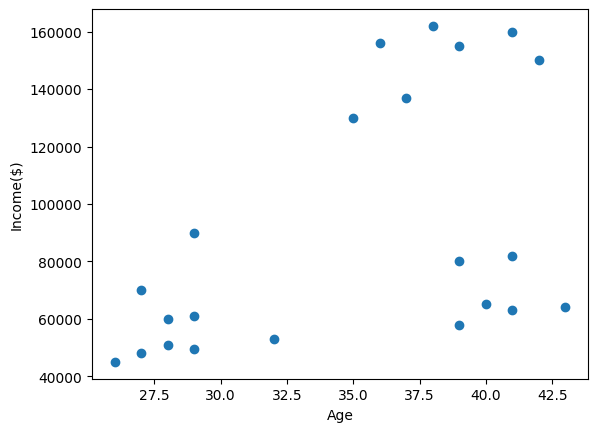

In [44]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [45]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init='auto')
km.fit(df[['Age', 'Income($)']])

KMeans(n_clusters=3)

In [46]:
km.labels_

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [47]:
km.inertia_

1577046058.883117

In [48]:
df['cluster'] = km.labels_

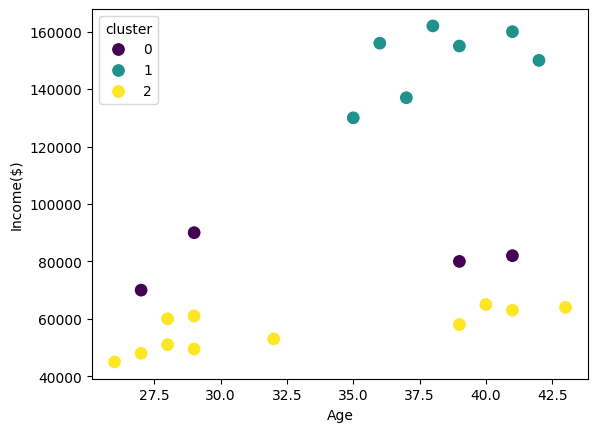

In [49]:
import seaborn as sns

sns.scatterplot(x='Age', y='Income($)', hue='cluster', data=df, palette='viridis', s=100)
plt.show()

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(columns=['Age', 'Income($)'])

df_scaled[['Income($)', 'Age']] = scaler.fit_transform(df[['Income($)', 'Age']])
df_scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [51]:
km = KMeans(n_clusters=3, n_init='auto')
km.fit(df_scaled[['Age', 'Income($)']])
km.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

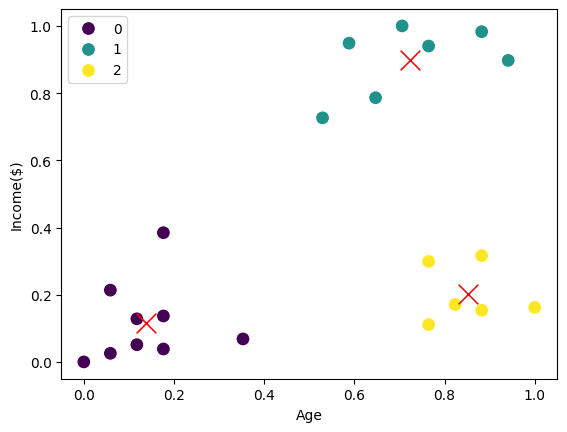

In [52]:
df_scaled['cluster'] = km.labels_

sns.scatterplot(x='Age', y='Income($)', hue='cluster', data=df_scaled, palette='viridis', s=100)
sns.scatterplot(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1], color='red', s=200, marker='x')
plt.show()

In [53]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

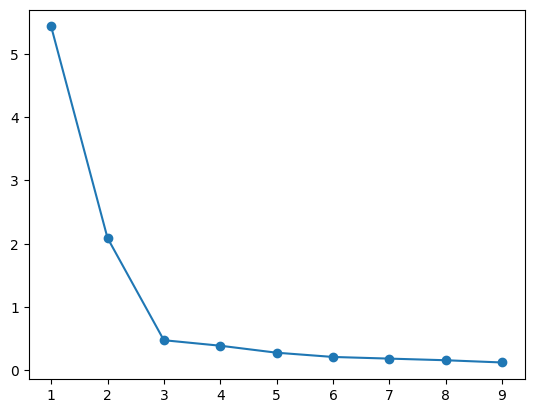

In [57]:
sse = []

for k in range(1, 10):
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df_scaled[['Age', 'Income($)']])
    sse.append(km.inertia_)

plt.plot(range(1, 10), sse, marker='o')
plt.show()